In [1]:
import json

# 파일 경로에 맞게 수정하세요
lane_file_path = 'result.json'
speed_file_path = 'speed_dic.json'
start_file_path='start.json'
depth_file_path='depth_dic.json'

# JSON 파일 읽어오기
with open(lane_file_path, 'r', encoding='utf-8') as file:
    lane_data = json.load(file)
with open(speed_file_path, 'r', encoding='utf-8') as file:
    speed_data = json.load(file)
with open(start_file_path, 'r', encoding='utf-8') as file:
    start_data = json.load(file)
with open(depth_file_path, 'r', encoding='utf-8') as file:
    depth_data = json.load(file)

# 읽어온 데이터 확인
print(lane_data.keys())
print(speed_data.keys())
print(depth_data.keys())

dict_keys(['vehicle0', 'vehicle1', 'vehicle8'])
dict_keys(['vehicle1', 'vehicle0', 'vehicle8'])
dict_keys(['vehicle1', 'vehicle0', 'vehicle8'])


In [2]:
## 속도 n 배 시키기
n=2

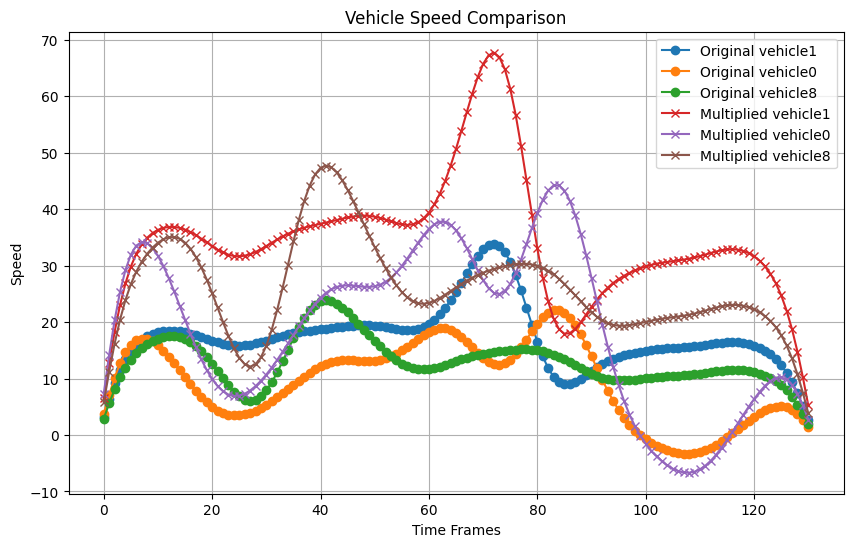

In [3]:
import matplotlib.pyplot as plt

def speed_multiplier(speed_list, n):
    return [speed * n for speed in speed_list]

# 새로운 변수를 생성하여 모든 차량의 속도를 n배로 증가시킴
multiplied_speed_data = {}

for vehicle, speeds in speed_data.items():
    multiplied_speed_data[vehicle] = speed_multiplier(speeds, n)

# 그래프 출력
plt.figure(figsize=(10, 6))

# 원래 속도 데이터 플롯
for vehicle, speeds in speed_data.items():
    plt.plot(speeds, label=f'Original {vehicle}', marker='o')

# 증가된 속도 데이터 플롯
for vehicle, speeds in multiplied_speed_data.items():
    plt.plot(speeds, label=f'Multiplied {vehicle}', marker='x')

# 그래프 설정
plt.title('Vehicle Speed Comparison')
plt.xlabel('Time Frames')
plt.ylabel('Speed')
plt.legend()
plt.grid(True)
plt.show()

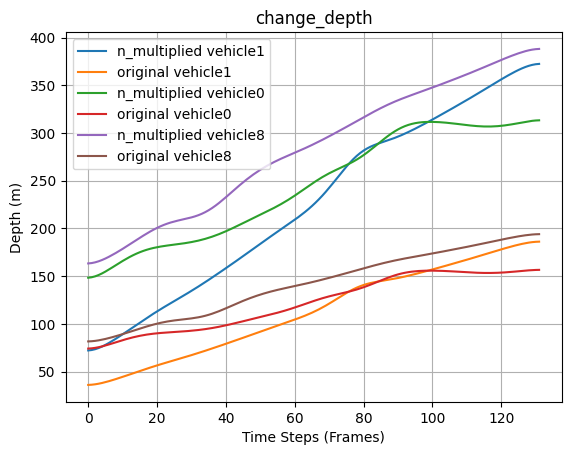

In [4]:
multiplied_n_depth_dic={}

fps= 15
# 시간 간격 (예: 1초)
time_interval = 1.0/fps  # 초 단위로 설정

for key in multiplied_speed_data.keys(): #이거 바꾸고
    multiplied_n_depth_dic[key]=[n*start_data[key]]
    # 속도를 기반으로 depth 값 업데이트
    for speed in multiplied_speed_data[key]: # 이거 바꾸고
        # 속도를 고려한 depth 변화 계산
        change_in_depth = speed * time_interval  # 예: 속도(m/s) * 시간(s) = 변화량(m)
        new_depth = multiplied_n_depth_dic[key][-1] + change_in_depth  # 마지막 depth 값에 변화량 추가
        multiplied_n_depth_dic[key].append(new_depth)  # 새로운 depth 값을 리스트에 추가

# 결과 출력 및 그래프 그리기
for vehicle, depths in multiplied_n_depth_dic.items():
    #print(f"'{vehicle}': {depths}")

    # 그래프 그리기
    plt.plot(depths, label=f'n_multiplied {vehicle}')
    plt.plot(depth_data[vehicle], label=f'original {vehicle}')

# 그래프 꾸미기
plt.title("change_depth")
plt.xlabel("Time Steps (Frames)")
plt.ylabel("Depth (m)")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# JSON 파일로 저장
with open("multiplied_n_depth_dic.json", "w") as json_file:
    json.dump(multiplied_n_depth_dic, json_file)

In [6]:
### 강소은 꺼   ## 절댓값

In [9]:
vehicle = 'vehicle0'
change = {15:50, 70:20} # frame:velocity

origin_vel = speed_data[vehicle]
changed_vel = origin_vel.copy()
for frame, velocity in change.items():
    changed_vel[frame] = velocity

In [10]:
import numpy as np

def smooth_velocity_transition(origin_vel, changed_vel, change, window_size=7):
    for frame, velocity in change.items():
        start_frame = max(0, frame - window_size)
        end_frame = min(len(origin_vel) - 1, frame + window_size)

        if start_frame < frame:
            changed_vel[start_frame:frame] = np.linspace(changed_vel[start_frame], velocity, frame - start_frame)

        if frame < end_frame:
            changed_vel[frame:end_frame] = np.linspace(velocity, changed_vel[end_frame], end_frame - frame)

    return changed_vel

linear_interpolated_vel = smooth_velocity_transition(origin_vel, changed_vel, change)


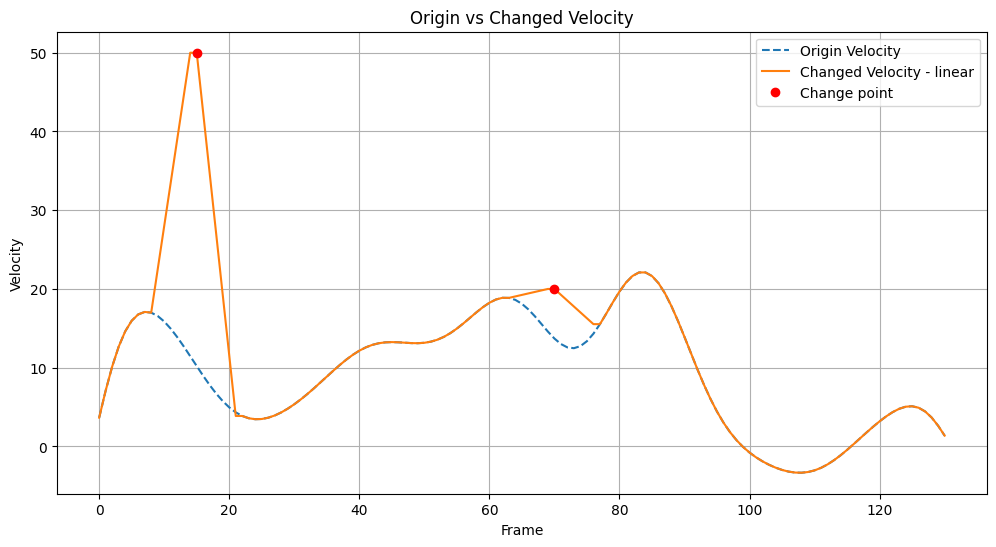

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(origin_vel, label='Origin Velocity', linestyle='--')
plt.plot(linear_interpolated_vel, label='Changed Velocity - linear', linestyle='-')
# plt.plot(spline_interpolated_vel, label='Changed Velocity - spline', linestyle='-')

label = True
for frame, velocity in change.items():
    plt.plot(frame, velocity, 'ro', label=f'Change point' if label else None)
    label = False

plt.xlabel('Frame')
plt.ylabel('Velocity')
plt.title('Origin vs Changed Velocity')
plt.legend()
plt.grid(True)

plt.show()

In [12]:
changed_speed_data=speed_data
changed_speed_data[vehicle]=changed_vel

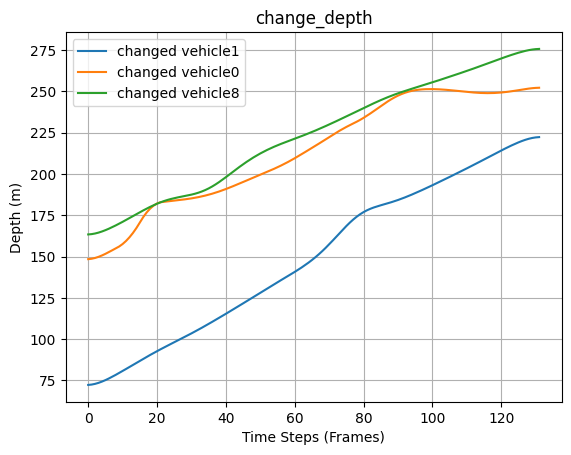

In [13]:
changed_depth_dic={}

fps= 15
# 시간 간격 (예: 1초)
time_interval = 1.0/fps  # 초 단위로 설정

for key in changed_speed_data.keys(): #이거 바꾸고
    changed_depth_dic[key]=[n*start_data[key]]
    # 속도를 기반으로 depth 값 업데이트
    for speed in changed_speed_data[key]: # 이거 바꾸고
        # 속도를 고려한 depth 변화 계산
        change_in_depth = speed * time_interval  # 예: 속도(m/s) * 시간(s) = 변화량(m)
        new_depth = changed_depth_dic[key][-1] + change_in_depth  # 마지막 depth 값에 변화량 추가
        changed_depth_dic[key].append(new_depth)  # 새로운 depth 값을 리스트에 추가

# 결과 출력 및 그래프 그리기
for vehicle, depths in changed_depth_dic.items():
    #print(f"'{vehicle}': {depths}")

    # 그래프 그리기
    plt.plot(depths, label=f'changed {vehicle}')
    #plt.plot(depth_data[vehicle], label=f'original {vehicle}')

# 그래프 꾸미기
plt.title("change_depth")
plt.xlabel("Time Steps (Frames)")
plt.ylabel("Depth (m)")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# JSON 파일로 저장
with open("changed_depth_dic.json", "w") as json_file:
    json.dump(changed_depth_dic, json_file)